In [31]:
from pathlib import Path
import torch as t
import polars as rs
import matplotlib.pyplot as plt
device = "cuda" if t.cuda.is_available() else "cpu"

from train_probe import ProbeQwen

In [4]:
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"

pqwen = ProbeQwen(model_name)

pqwen.probe.load_state_dict(t.load(Path("best_model.pt"), weights_only=True))

<All keys matched successfully>

In [8]:
df = rs.read_ipc("responses.arrow")

Could not memory_map compressed IPC file, defaulting to normal read. Toggle off 'memory_map' to silence this warning.


In [136]:
def probe_chain_of_thought(text, label):
    tokens = pqwen.tokenizer.tokenize(text)
    tokens = [token.replace("Ġ", " ").replace("Ċ", "\n") for token in tokens]
    
    probs = pqwen.from_text(text)[0, -500:].softmax(dim=-1)
    plt.plot(probs[:, label].detach().cpu())
    
    print(f"{label=}")
    
    for token, value in zip(tokens, probs[:, label]):
        integer_mag = min(int( (1 - value) * 255), 255)
        print(f"\033[38;2;{integer_mag};{integer_mag};{integer_mag}m{token}", end="")

label=8
Answer the following multiple choice question, selecting from the answer A through to J. After thinking, reply directly with your answer. 

The last character of your response must be the letter you have chosen.

Question:

Which of the following fallacies is a way of suppressing evidence that eliminates a source of evidence from consideration by claiming the source is flawed, when there is no true relationship between the alleged flaw and the reliability of the source?

Options:

A: straw man
B: snob appeal
C: bandwagon fallacy
D: appeal to anonymous authority
E: false dilemma
F: significance
G: appeal to ignorance
H: argumentum ad populum
I: poisoning the well
J: cherry picking

Answer:
    
<think>
Alright, so I've got this question about logical fallacies, and I need to figure out which one matches the description given. Let me try to break it down step by step.

The question is asking about a fallacy where someone suppresses evidence by eliminating a source because they cl

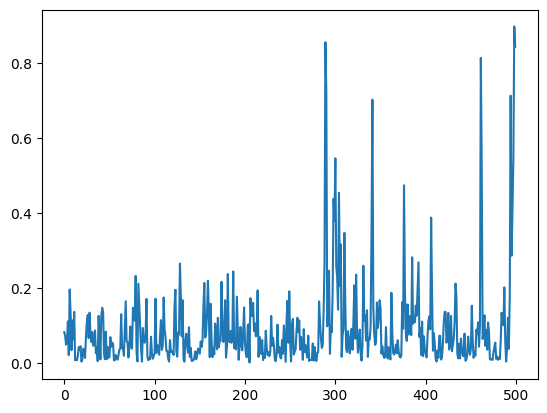

In [142]:
sample = df.sample(1)
label = sample['numeric label'][0]
text = sample['text'][0]

probe_chain_of_thought(text, label)

Answer the following multiple choice question, selecting from the answer A through to J. After thinking, reply directly with your answer. 

The last character of your response must be the letter you have chosen.

Question:

You have a coin and you would like to check whether it is fair or biased. More specifically, let $\theta$ be the probability of heads, $\theta = P(H)$. Suppose that you need to choose between the following hypotheses: H_0 (null hypothesis): The coin is fair, i.e. $\theta = \theta_0 = 1 / 2$. H_1 (the alternative hypothesis): The coin is not fair, i.e. $\theta > 1 / 2$. We toss 100 times and observe 60 heads. What is the P-value?

Options:

A: 0.115
B: 0.28
C: 0.023
D: 0.157
E: 0.95
F: 0.001
G: 0.5
H: 0.1
I: 0.05
J: 0.082

Answer:
    
<think>
Okay, so I have this statistics problem here about determining whether a coin is fair or biased. The question is about calculating the p-value after observing 60 heads in 100 tosses. Hmm, I remember that p-value is the probabil

In [61]:
print("\033[38;2;255;0;0m hello")

 hello


In [69]:
probs.shape

torch.Size([500, 10])